# Exploratory Data Analysis - FIFA 2022
## Jindřich Tvrdý - TVR0041

### **Dataset info**
Dataset about stats of football players in a videogame called FIFA 2022

We will be working with only certain attributes of this dataset because it is otherwise too big to be analyzed. I chose in my opinion the most important attributes.

**Dataset attributes:**
- Name - name of a player
- Age - age of a player
- Height - height of a player
- Nationality - nationality of a player
- Overall - the overall number that represents how good the player is, the higher, the better
- Potential - the maximum Overall that this player can achieve in the game
- Growth - the growth of a player
- BestPosition - player's preffered position in the line-up
- Club - the club player currently plays in
- ValueEUR - player's current market value
- ContractUntil - the year player's contract with their club ends
- ClubJoined - the year player has joined their current club
- PrefferedFoot - player's stronger foot
- SkillMoves - how good a player is in dribling, maximum value 5
- WeakFoot - how good player's weak foot is, maximum value 5
- PaceTotal - player's speed
- ShootingTotal - player's shooting skills
- PassingTotal - player's passing skills
- DribblingTotal - player's dribbling ability
- DefendingTotal - player's defending ability
- PhysicalityTotal - player's physicality, more physical player can for example push less physical player

In [297]:
import pandas as pd # dataframes
import numpy as np # matrices and linear algebra
import matplotlib.pyplot as plt # plotting
import seaborn as sns # another matplotlib interface - styled and easier to use

In [298]:
df_full = pd.read_csv('players_fifa22.csv', sep=',')
df_full = df_full[['Name','Age','Height','Nationality','Overall','Potential','Growth','BestPosition','Club','ValueEUR','WageEUR','ContractUntil','ClubJoined','PreferredFoot','SkillMoves','WeakFoot','PaceTotal','ShootingTotal','PassingTotal','DribblingTotal','DefendingTotal','PhysicalityTotal']]

### Show first and last 10 rows of the dataset

In [299]:
df_full.head(10)


Name  Age  Height Nationality  Overall  Potential  Growth  \
0           L. Messi   34     170   Argentina       93         93       0   
1     R. Lewandowski   32     185      Poland       92         92       0   
2  Cristiano Ronaldo   36     187    Portugal       91         91       0   
3          K. Mbappé   22     182      France       91         95       4   
4           J. Oblak   28     188    Slovenia       91         93       2   
5       K. De Bruyne   30     181     Belgium       91         91       0   
6          Neymar Jr   29     175      Brazil       91         91       0   
7           N. Kanté   30     168      France       90         90       0   
8            H. Kane   27     188     England       90         90       0   
9      M. ter Stegen   29     187     Germany       90         92       2   

  BestPosition                 Club   ValueEUR  ...  ClubJoined  \
0           RW  Paris Saint-Germain   78000000  ...        2021   
1           ST    FC Bayern München  119500000  ...        2014   
2           ST    Manchester United   45000000  ...        2021   
3           ST  Paris Saint-Germain  194000000  ...        2018   
4           GK   Atlético de Madrid  112000000  ...        2014   
5           CM      Manchester City  125500000  ...        2015   
6           LW  Paris Saint-Germain  129000000  ...        2017   
7          CDM              Chelsea  100000000  ...        2016   
8           ST    Tottenham Hotspur  129500000  ...        2010   
9           GK         FC Barcelona   99000000  ...        2014   

   PreferredFoot  SkillMoves WeakFoot  PaceTotal  ShootingTotal  PassingTotal  \
0           Left           4        4         85             92            91   
1          Right           4        4         78             92            79   
2          Right           5        4         87             94            80   
3          Right           5        4         97             88            80   
4          Right           1        3         87             92            78   
5          Right           4        5         76             86            93   
6          Right           5        5         91             83            86   
7          Right           2        3         78             66            75   
8          Right           3        5         70             91            83   
9          Right           1        4         88             85            88   

   DribblingTotal  DefendingTotal  PhysicalityTotal  
0              95              34                65  
1              85              44                82  
2              87              34                75  
3              92              36                77  
4              90              52                90  
5              88              64                78  
6              94              37                63  
7              81              87                83  
8              82              47                83  
9              90              45                88  

[10 rows x 22 columns]

In [300]:
df_full.tail(10)

Name  Age  Height          Nationality  Overall  Potential  \
19250      Guo Yunqi   24     175             China PR       48         53   
19251    Lu Xianyong   21     169             China PR       48         55   
19252        P. Kyum   20     172             China PR       48         53   
19253   Kim Bong Soo   21     183       Korea Republic       48         57   
19254     F. Emmings   17     195        United States       48         73   
19255       S. Black   19     180  Republic of Ireland       48         62   
19256        Ma Zhen   23     196             China PR       48         52   
19257     Yang Haoyu   20     183             China PR       48         55   
19258       He Siwei   20     174             China PR       48         58   
19259  Chen Guoliang   22     186             China PR       48         53   

       Growth BestPosition                               Club  ValueEUR  ...  \
19250       5          CAM      Shijiazhuang Ever Bright F.C.     70000  ...   
19251       7          CAM      Chongqing Liangjiang Athletic     90000  ...   
19252       5           ST          Henan Songshan Longmen FC     70000  ...   
19253       9          CDM                     Jeju United FC    100000  ...   
19254      25           GK                Minnesota United FC    130000  ...   
19255      14           CB                         Finn Harps    100000  ...   
19256       4           GK                Shanghai Shenhua FC     50000  ...   
19257       7           CB  Dalian Professional Football Club     90000  ...   
19258      10           CB      Chongqing Liangjiang Athletic    100000  ...   
19259       5           CB                        Shenzhen FC     70000  ...   

       ClubJoined  PreferredFoot  SkillMoves WeakFoot  PaceTotal  \
19250        2020          Right           2        2         61   
19251        2021          Right           2        3         65   
19252        2020          Right           2        2         53   
19253        2021          Right           2        2         53   
19254        2020           Left           1        2         51   
19255        2021          Right           2        3         56   
19256        2020          Right           1        2         49   
19257        2021          Right           2        3         57   
19258        2021          Right           2        3         61   
19259        2021          Right           2        3         55   

       ShootingTotal  PassingTotal  DribblingTotal  DefendingTotal  \
19250             34            48              48              47   
19251             41            52              51              37   
19252             50            37              43              19   
19253             38            49              47              45   
19254             45            59              53              20   
19255             27            29              33              48   
19256             47            45              46              54   
19257             26            29              28              51   
19258             25            32              32              49   
19259             27            29              30              50   

       PhysicalityTotal  
19250                42  
19251                39  
19252                39  
19253                57  
19254                42  
19255                53  
19256                44  
19257                56  
19258                51  
19259                54  

[10 rows x 22 columns]

### Summary of the data

Here we can see all the categorical and the numerical columns (column names 'Name', 'FullName' and 'PhotoUrl' are excluded as they are not a category)

In [301]:
cols_categories = df_full.select_dtypes(exclude=np.number).columns
# cols_categories.tolist()

for item in cols_categories:
    if item != 'Name':
        print(item)
        print(df_full[item].unique().tolist())
        print()

Nationality
['Argentina', 'Poland', 'Portugal', 'France', 'Slovenia', 'Belgium', 'Brazil', 'England', 'Germany', 'Korea Republic', 'Senegal', 'Netherlands', 'Italy', 'Egypt', 'Spain', 'Uruguay', 'Norway', 'Costa Rica', 'Croatia', 'Scotland', 'Slovakia', 'Algeria', 'Hungary', 'Switzerland', 'Denmark', 'Gabon', 'Morocco', 'Nigeria', 'Serbia', 'Austria', 'Sweden', 'Montenegro', "Côte d'Ivoire", 'Mexico', 'Greece', 'Bosnia and Herzegovina', 'Armenia', 'Finland', 'Cameroon', 'Colombia', 'Ghana', 'Canada', 'Czech Republic', 'United States', 'Jamaica', 'Turkey', 'Wales', 'Russia', 'Burkina Faso', 'Togo', 'Venezuela', 'Chile', 'Ukraine', 'Albania', 'Guinea', 'Northern Ireland', 'Israel', 'Congo DR', 'New Zealand', 'China PR', 'Peru', 'Central African Republic', 'Iceland', 'Mali', 'Japan', 'Iran', 'North Macedonia', 'Ecuador', 'Republic of Ireland', 'Mozambique', 'Cape Verde Islands', 'Romania', 'Angola', 'Kosovo', 'Tunisia', 'Australia', 'Paraguay', 'Libya', 'Zambia', 'Zimbabwe', 'Syria', 'Sau

In [302]:
cols_numeric = df_full.select_dtypes(include=np.number).columns
cols_numeric.tolist()

['Age',
 'Height',
 'Overall',
 'Potential',
 'Growth',
 'ValueEUR',
 'WageEUR',
 'ContractUntil',
 'ClubJoined',
 'SkillMoves',
 'WeakFoot',
 'PaceTotal',
 'ShootingTotal',
 'PassingTotal',
 'DribblingTotal',
 'DefendingTotal',
 'PhysicalityTotal']

Here we can see the general description of both categorical and numerical columns

In [303]:
df_full.describe(exclude=['number'])

Name Nationality BestPosition        Club PreferredFoot
count          19260       19260        19260       19260         19260
unique         18058         163           15         702             2
top     J. Rodríguez     England           CB  Free agent         Right
freq              12        1718         3744          76         14670

In [304]:
df_full.describe(include=['number'])

Age        Height       Overall     Potential        Growth  \
count  19260.000000  19260.000000  19260.000000  19260.000000  19260.000000   
mean      25.184683    181.305036     65.815628     71.100104      5.284476   
std        4.737340      6.866151      6.817297      6.092103      5.472201   
min       16.000000    155.000000     48.000000     49.000000      0.000000   
25%       21.000000    176.000000     62.000000     67.000000      0.000000   
50%       25.000000    181.000000     66.000000     71.000000      4.000000   
75%       29.000000    186.000000     70.000000     75.000000      9.000000   
max       54.000000    206.000000     93.000000     95.000000     26.000000   

           ValueEUR        WageEUR  ContractUntil    ClubJoined    SkillMoves  \
count  1.926000e+04   19260.000000   19184.000000  19260.000000  19260.000000   
mean   2.857652e+06    8973.528037    2022.775334   2019.324766      2.354517   
std    7.604532e+06   19415.497147       1.219224      2.087867      0.767592   
min    0.000000e+00       0.000000    2021.000000   2002.000000      1.000000   
25%    4.750000e+05    1000.000000    2022.000000   2019.000000      2.000000   
50%    9.750000e+05    3000.000000    2022.000000   2020.000000      2.000000   
75%    2.000000e+06    8000.000000    2024.000000   2021.000000      3.000000   
max    1.940000e+08  350000.000000    2031.000000   2021.000000      5.000000   

           WeakFoot     PaceTotal  ShootingTotal  PassingTotal  \
count  19260.000000  19260.000000   19260.000000  19260.000000   
mean       2.946677     67.910228      53.535514     57.853323   
std        0.670731     10.656453      13.813476      9.835494   
min        1.000000     28.000000      18.000000     25.000000   
25%        3.000000     62.000000      44.000000     52.000000   
50%        3.000000     68.000000      56.000000     58.000000   
75%        3.000000     75.000000      64.000000     65.000000   
max        5.000000     97.000000      94.000000     93.000000   

       DribblingTotal  DefendingTotal  PhysicalityTotal  
count    19260.000000      19260.0000      19260.000000  
mean        63.028712         50.0581         64.676584  
std          9.704853         16.3888          9.626269  
min         26.000000         14.0000         29.000000  
25%         58.000000         35.0000         58.000000  
50%         64.000000         54.0000         66.000000  
75%         69.000000         63.0000         72.000000  
max         95.000000         91.0000         92.000000

### Row and column count

In [305]:
df_full.shape

(19260, 22)

### Column names

In [306]:
df_full.columns

Index(['Name', 'Age', 'Height', 'Nationality', 'Overall', 'Potential',
       'Growth', 'BestPosition', 'Club', 'ValueEUR', 'WageEUR',
       'ContractUntil', 'ClubJoined', 'PreferredFoot', 'SkillMoves',
       'WeakFoot', 'PaceTotal', 'ShootingTotal', 'PassingTotal',
       'DribblingTotal', 'DefendingTotal', 'PhysicalityTotal'],
      dtype='object')

### Null or NA data check

Data does not include any null or NA values - we can see the number of the full count and the null/NA counts are the same

In [307]:
print(df_full.isnull().count())

Name                19260
Age                 19260
Height              19260
Nationality         19260
Overall             19260
Potential           19260
Growth              19260
BestPosition        19260
Club                19260
ValueEUR            19260
WageEUR             19260
ContractUntil       19260
ClubJoined          19260
PreferredFoot       19260
SkillMoves          19260
WeakFoot            19260
PaceTotal           19260
ShootingTotal       19260
PassingTotal        19260
DribblingTotal      19260
DefendingTotal      19260
PhysicalityTotal    19260
dtype: int64


In [308]:
print(df_full.isna().count())

Name                19260
Age                 19260
Height              19260
Nationality         19260
Overall             19260
Potential           19260
Growth              19260
BestPosition        19260
Club                19260
ValueEUR            19260
WageEUR             19260
ContractUntil       19260
ClubJoined          19260
PreferredFoot       19260
SkillMoves          19260
WeakFoot            19260
PaceTotal           19260
ShootingTotal       19260
PassingTotal        19260
DribblingTotal      19260
DefendingTotal      19260
PhysicalityTotal    19260
dtype: int64


# Data analysis

### Numbers of players based on how old they are

I would expect most players in FIFA 2022 to be between 20-30 years old.

In [309]:
df_player_numbers = df_full.groupby(['Age']).Age.count().reset_index(name='Count')
df_player_numbers

Age  Count
0    16     21
1    17    275
2    18    738
3    19   1093
4    20   1379
5    21   1563
6    22   1455
7    23   1401
8    24   1456
9    25   1404
10   26   1196
11   27   1198
12   28   1116
13   29   1184
14   30    893
15   31    823
16   32    623
17   33    465
18   34    347
19   35    254
20   36    146
21   37    104
22   38     61
23   39     39
24   40     13
25   41      7
26   42      2
27   43      3
28   54      1

In [310]:
fig = plt.figure(figsize=(10, 5))
plt.bar(df_player_numbers.Age, df_player_numbers.Count)


<BarContainer object of 29 artists>

<AxesSubplot: xlabel='BestPosition', ylabel='Age'>

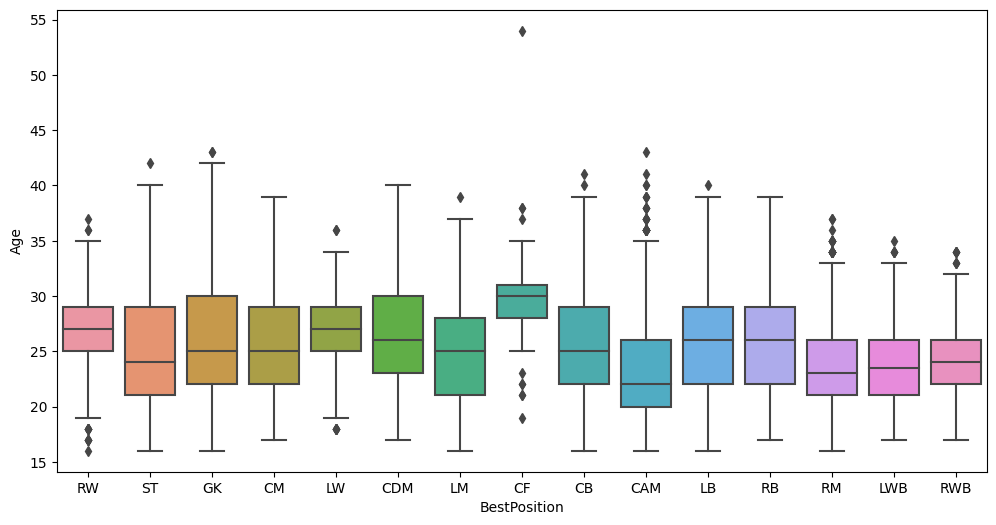

In [344]:
plt.figure(figsize=(12,6))
sns.boxplot(x='BestPosition', y='Age', data = df_full)

The most amount of players playing in FIFA 22 are players aged between 20 - 30 years old as we can see from the barplot, also we can see that not a lot of players play over the age of 35 years old and before the age of 16.

### Viewing the numbers of players on certain positions

I think the most players would be either in midfield positions or striker/winger positions, then central back positions.

In [311]:
df_number_of_categories = df_full.groupby(['BestPosition']).BestPosition.count().reset_index(name='Count')
df_number_of_categories

BestPosition  Count
0           CAM   2342
1            CB   3744
2           CDM   1508
3            CF     65
4            CM   1073
5            GK   2126
6            LB   1037
7            LM    862
8            LW    183
9           LWB    320
10           RB   1052
11           RM   1596
12           RW    326
13          RWB    353
14           ST   2673

In [312]:
fig = plt.figure(figsize=(10, 5))
plt.bar(df_number_of_categories.BestPosition, df_number_of_categories.Count)

<BarContainer object of 15 artists>

Here we can see positions the players are assigned. We can clearly see that the positions such as CB, ST or GK have the highest amount of players assigned. These positions are always in the team's line-up. Then there are positions such as RWB, RW or LW which are not in every line-up. We can see that not as many players play in those positions as opposed to the first group I mentioned. I have been wrong with the LW, RW position.

### Overall based on average age of a player

I would expect the players to have higher overalls the older they are, but i would also expect that there is some "peak" after which the player's overall start to decline.

In [313]:
avg_age_per_overall = df_full.groupby('Overall').Age.mean().reset_index(name='AvgAge')
plt.figure(figsize=(9,6))
sns.lineplot(data=avg_age_per_overall, x='Overall', y='AvgAge')

<AxesSubplot: xlabel='Overall', ylabel='AvgAge'>

In this lineplot we can clearly see that the older the player, the higher is a change of having higher overall number.

Now let's do 6 lineplots, each representing one of the key player attributes ('PaceTotal', 'ShootingTotal', 'PassingTotal', 'DribblingTotal', 'DefendingTotal', 'PhysicalityTotal') progressing with age. My guess would be that some attributes, especially pace, would degrade over time, but for examply passing or defending should be in my opinion higher overtime, because of the skill and experience obtained over the years.

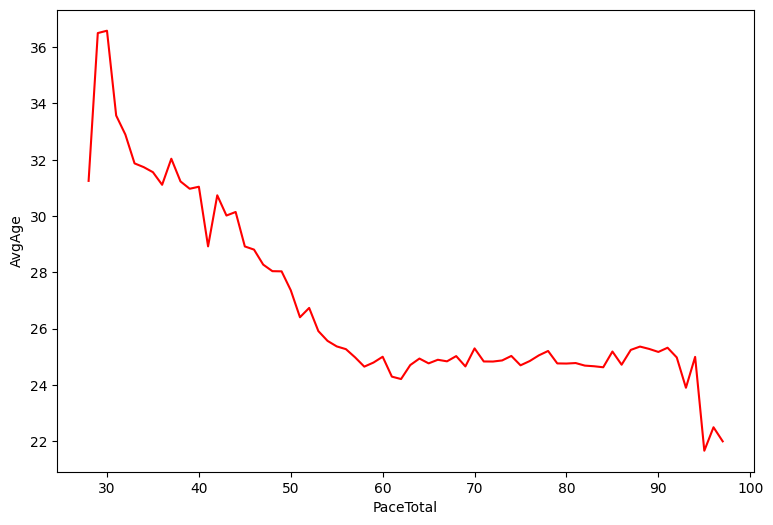

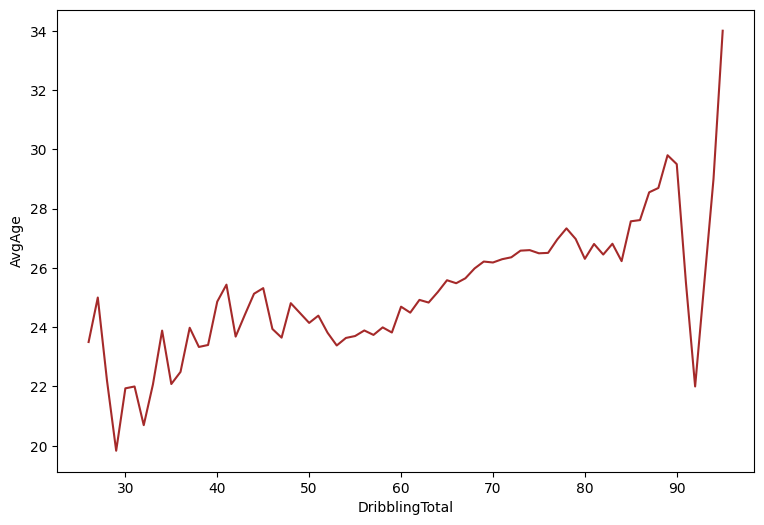

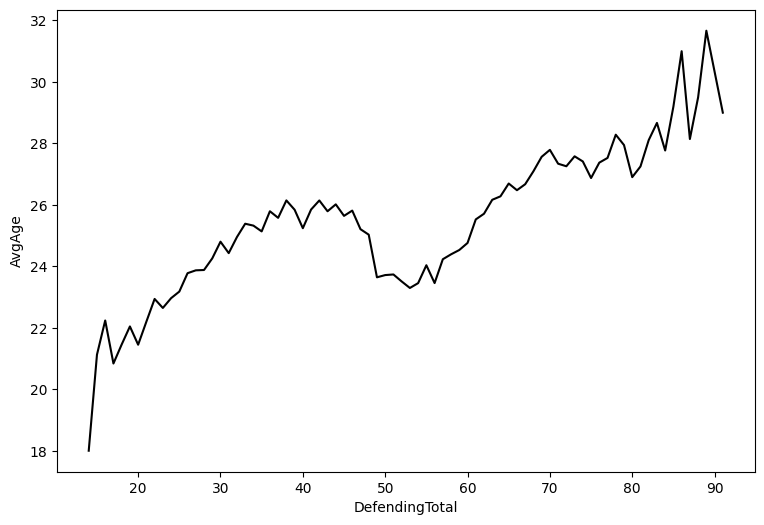

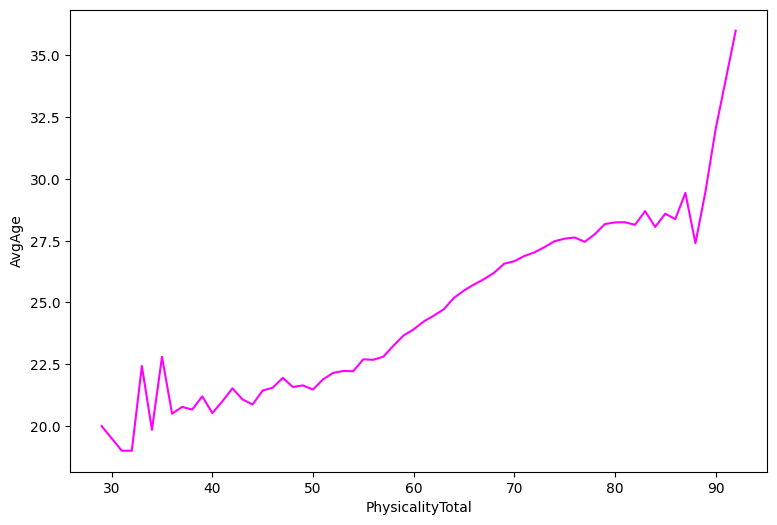

In [314]:
attrib_list = ['PaceTotal','ShootingTotal','PassingTotal','DribblingTotal','DefendingTotal','PhysicalityTotal']
color_list = ['red','green','blue','brown','black','magenta']

count = 0

for item in attrib_list:
    avg_age_per_overall = df_full.groupby(item).Age.mean().reset_index(name='AvgAge')
    plt.figure(figsize=(9,6))
    sns.lineplot(data=avg_age_per_overall, x=item, y='AvgAge', color=color_list[count])
    count += 1

We can see that all the key attribues are progressing over the course of players getting older apart from one - pace. It is logical that every player loses their pace over time and becomes slower as they are getting older. It is also interesting to see that the Physicality stat grows with average age. Other attributes probably grow because of players getting more experienced and also a lot of players are getting retired after certain age and only the better ones remain active as we can see in a barplot above.

### Correlation between key attributes of players of different overalls

I think that some attributes should positively correlate such as dribbling and shooting, being it the domain of strikers, i would also expect the defending and physical atribute to positively correlate.

In [315]:
selected_columns = ['PaceTotal','ShootingTotal','PassingTotal','DribblingTotal','DefendingTotal','PhysicalityTotal']
sns.pairplot(data=df_full, vars=selected_columns, hue='Overall')

Here we can see for example how Physicality and Defending positively correlates, also Passing and Dribbling corelates. My expectation that shooting and dribling would correlate positively were right, so were expectations about positive correlations between defending and physical.

### Correlation of all attributes

I would expect similar correlations as shown above, but I would also expect positive correlations between overall and market value. I would expect negative correlation between age and market value.

/tmp/ipykernel_727/3201318963.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_full.corr(), square=True, cmap='RdYlGn', vmin=-1, vmax=1, annot=True)


<AxesSubplot: >

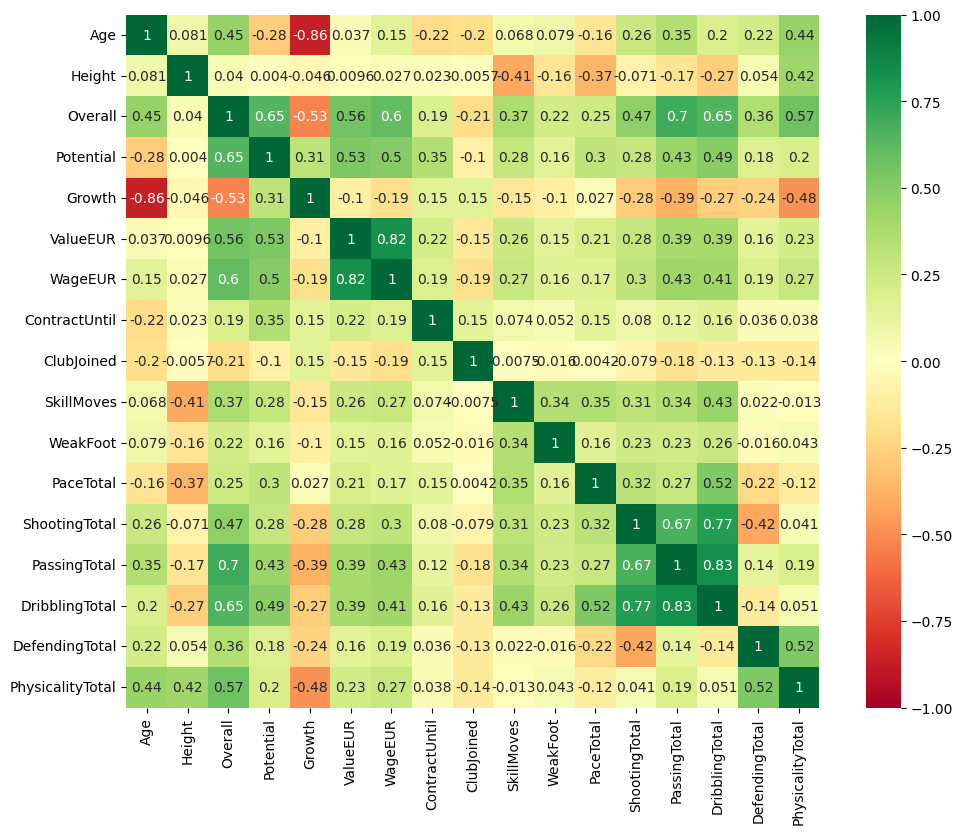

In [316]:
plt.figure(figsize=(12, 9))
sns.heatmap(df_full.corr(), square=True, cmap='RdYlGn', vmin=-1, vmax=1, annot=True)

My correlation expectations were not wrong.

### Histograms

Here we can see some general information about the whole FIFA 2022 player base.

In [317]:
cols = df_full.select_dtypes(include=np.number).columns
df_full[cols].hist(figsize=(12,12),bins=40)
plt.show()

We are for example able to see that most of the players have their weak foot stat at 3 and also none have their weak foot stat at 5. Then for example most player's SkillMoves are at 2 and also only minimum of players have their skill rating at 5.  

### Young and talented players

Here we will define players that are still very young, their potential is very high and their current growth is high as well. This should give us all the young football talents.

In my opinion these young players should have relatively high market value, considering the trend that younger players with high potencial tend to have high market value.

In [318]:
promising_players = df_full.loc[(df_full.Growth > 4) & (df_full.Potential > 84)].sort_values(by='Potential', ascending=False)
promising_players[['Name', 'Age', 'Overall', 'Potential', 'BestPosition', 'ValueEUR']].head(20)

Name  Age  Overall  Potential BestPosition   ValueEUR
26             E. Haaland   20       88         93           ST  137500000
42    T. Alexander-Arnold   22       87         92           RB  114000000
102              P. Foden   21       84         92          CAM   94500000
117            K. Havertz   22       84         92          CAM   94500000
41             F. de Jong   24       87         92           CM  119500000
289                 Pedri   18       81         91          CAM   54000000
173            João Félix   21       83         91          CAM   82000000
175             F. Chiesa   23       83         91          CAM   80500000
88             M. de Ligt   21       85         90           CB   75000000
119          T. Hernández   23       84         90           LB   62500000
441          Vinícius Jr.   20       80         90           RM   46500000
205         Ferran Torres   21       82         90          CAM   68500000
743        R. Gravenberch   19       78         90          CAM   33000000
235          D. Upamecano   22       82         90           CB   64000000
1415            Ansu Fati   18       76         90           LW   17500000
745              F. Wirtz   18       78         89          CAM   29500000
291         D. Kulusevski   21       81         89           LM   58000000
748          E. Camavinga   18       78         89           CM   29500000
210          Éder Militão   23       82         89           CB   56500000
737          M. Greenwood   19       78         89          CAM   30500000

/tmp/ipykernel_727/3453205192.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(promising_players.corr(), square=True, cmap='RdYlGn', vmin=-1, vmax=1, annot=True)


<AxesSubplot: >

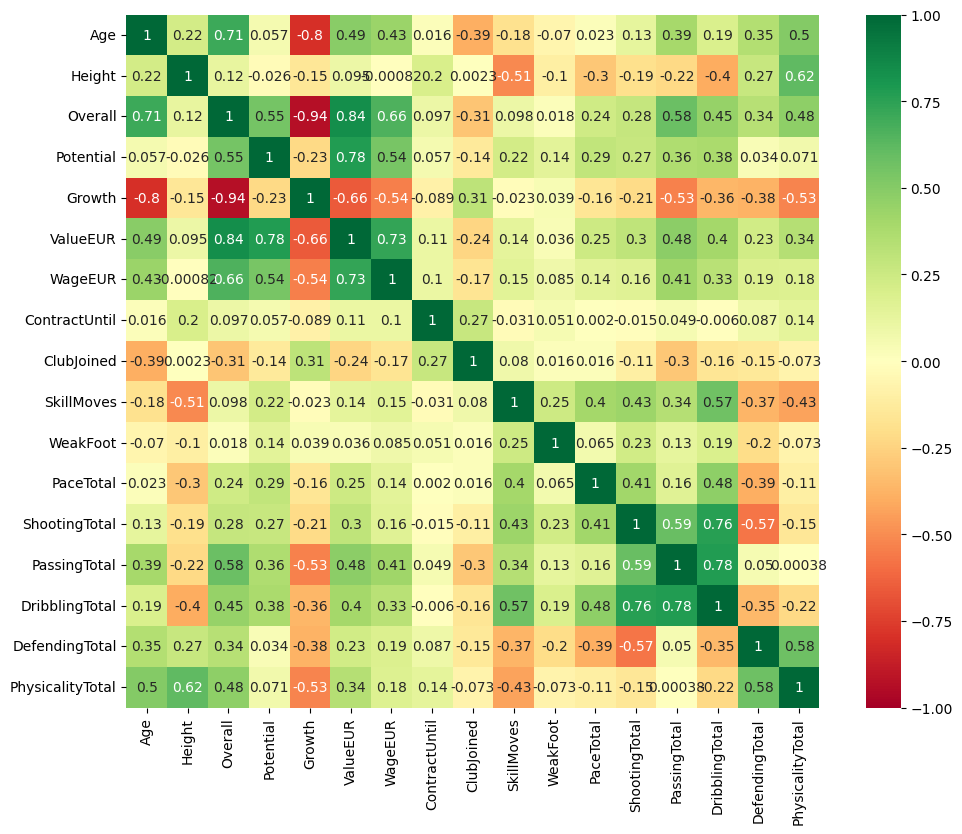

In [319]:
plt.figure(figsize=(12, 9))
sns.heatmap(promising_players.corr(), square=True, cmap='RdYlGn', vmin=-1, vmax=1, annot=True)

The heatmap gives us an idea how young players attributes correlate with each other. We can see that their Potential and Overall correlate positively. We can see that if a young player has a high overall it very much increases their value as well. Same goes for potential.

Text(0.5, 1.0, 'Potential players by position')

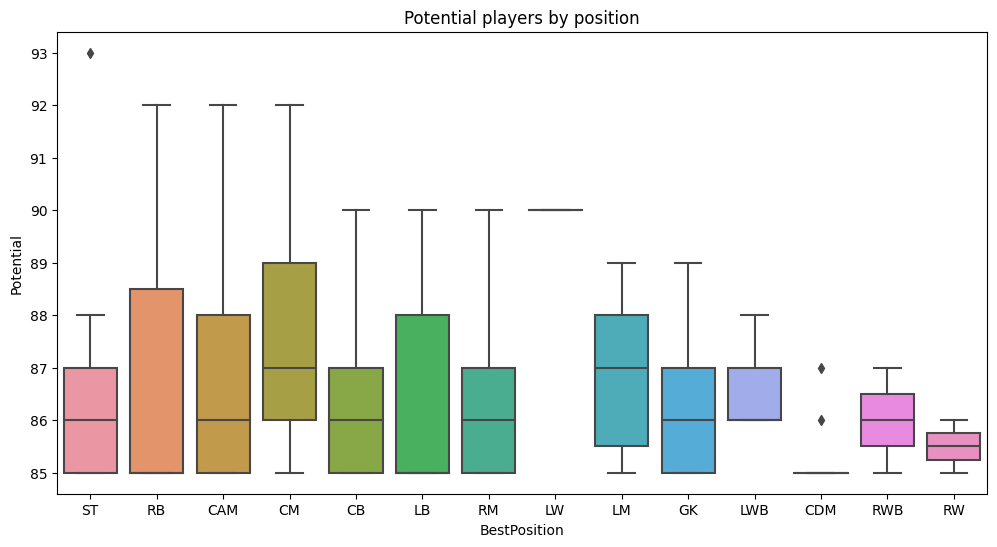

In [320]:
plt.figure(figsize=(12,6))
sns.boxplot(x='BestPosition', y='Potential', data = promising_players).set_title('Potential players by position')

The position CM has young players with the highest potential. Let's see the players. (Of course the highest potential is an outlier of the ST position group - E. Haaland)

In [321]:
promising_players = promising_players.loc[(promising_players.BestPosition == 'CM')].sort_values(by='Potential', ascending=False)
promising_players.head(15)

Name  Age  Height  Nationality  Overall  Potential  Growth  \
41        F. de Jong   24     180  Netherlands       87         92       5   
607    J. Bellingham   18     186      England       79         89      10   
174      F. Valverde   22     182      Uruguay       83         89       6   
124       N. Barella   24     172        Italy       84         89       5   
748     E. Camavinga   18     182       France       78         89      11   
206       F. Neuhaus   24     185      Germany       82         87       5   
230      Rúben Neves   24     180     Portugal       82         87       5   
227     M. Locatelli   23     185        Italy       82         87       5   
4786      N. Rovella   19     179        Italy       70         87      17   
1085       S. Tonali   21     181        Italy       77         86       9   
332   D. van de Beek   24     184  Netherlands       81         86       5   
3271      B. Gilmour   20     170     Scotland       72         86      14   
746      M. Caqueret   21     174       France       78         86       8   
7830      A. Vranckx   18     183      Belgium       67         85      18   
739         U. Račić   23     193       Serbia       78         85       7   

     BestPosition                      Club   ValueEUR  ...  ClubJoined  \
41             CM              FC Barcelona  119500000  ...        2019   
607            CM         Borussia Dortmund   37000000  ...        2020   
174            CM            Real Madrid CF   58000000  ...        2016   
124            CM                     Inter   63500000  ...        2020   
748            CM            Real Madrid CF   29500000  ...        2021   
206            CM  Borussia Mönchengladbach   46000000  ...        2017   
230            CM   Wolverhampton Wanderers   46000000  ...        2017   
227            CM                  Juventus   42000000  ...        2021   
4786           CM                     Genoa    4099999  ...        2021   
1085           CM                  AC Milan   22500000  ...        2021   
332            CM         Manchester United   38500000  ...        2020   
3271           CM              Norwich City    5500000  ...        2018   
746            CM        Olympique Lyonnais   30000000  ...        2018   
7830           CM             VfL Wolfsburg    2600000  ...        2021   
739            CM               Valencia CF   28000000  ...        2018   

      PreferredFoot  SkillMoves WeakFoot  PaceTotal  ShootingTotal  \
41            Right           4        3         81             69   
607           Right           3        4         75             69   
174           Right           3        4         86             74   
124           Right           3        3         78             71   
748            Left           4        3         72             65   
206           Right           3        4         64             72   
230           Right           3        4         59             75   
227           Right           3        4         61             72   
4786          Right           3        4         67             49   
1085          Right           3        4         78             66   
332           Right           3        3         68             78   
3271          Right           3        3         67             54   
746           Right           3        3         73             58   
7830          Right           3        5         72             57   
739           Right           3        4         66             75   

      PassingTotal  DribblingTotal  DefendingTotal  PhysicalityTotal  
41              85              88              77                78  
607             73              80              75                77  
174             78              79              77                80  
124             79              86              75                78  
748             76              80              75                77  
206             79 

### Player's Overall and market value

Here we will try to understand how player's age, skills and overall functions with their value (ValueEUR). My guess would be that higher the player's overall, the higher is player's value.

In [322]:
df_player_value = df_full.groupby(['ValueEUR']).ValueEUR.count().reset_index(name='Count')
df_player_value

ValueEUR  Count
0            0     88
1         9000      1
2        15000      6
3        20000      3
4        25000      7
..         ...    ...
247  125500000      1
248  129000000      1
249  129500000      1
250  137500000      1
251  194000000      1

[252 rows x 2 columns]

<AxesSubplot: xlabel='ValueEUR', ylabel='Count'>

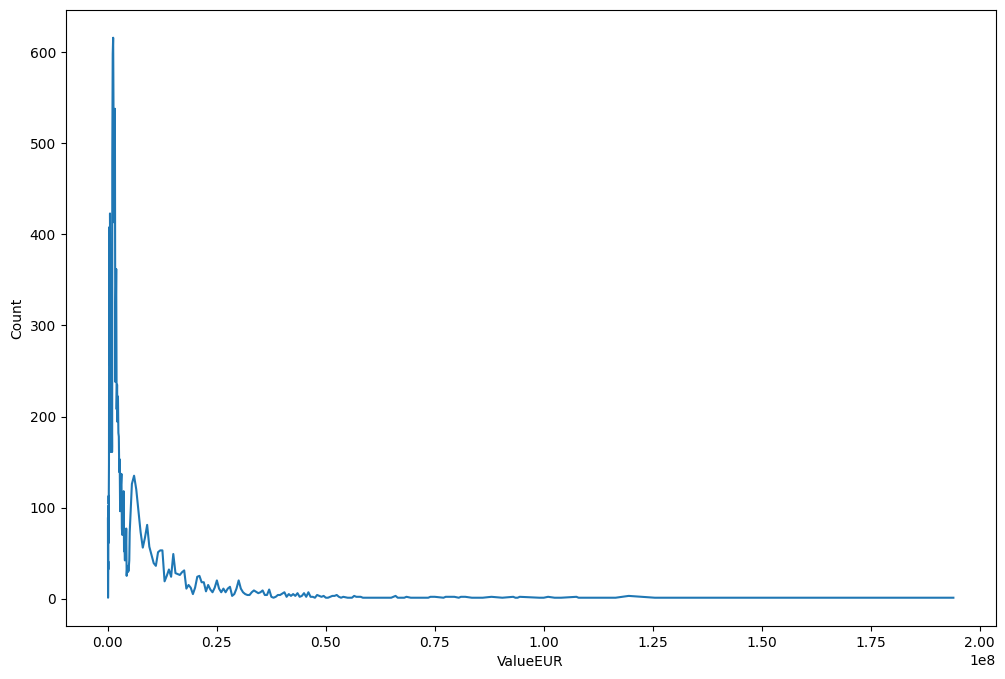

In [323]:
plt.figure(figsize=(12,8))
sns.lineplot(data=df_player_value, x='ValueEUR', y='Count')

Here we can see that most of the do not have high values, but some players have astronomical value.

In [324]:
avg_player_values = df_full.groupby('Overall').ValueEUR.mean().reset_index(name='AvgValueEUR')
avg_player_values.head()

Overall    AvgValueEUR
0       48   90333.333333
1       49   96971.830986
2       50  101500.000000
3       51  130909.090909
4       52  173190.243902

In [325]:
plt.figure(figsize=(9,6))
sns.lineplot(data=avg_player_values, x='Overall', y='AvgValueEUR')

<AxesSubplot: xlabel='Overall', ylabel='AvgValueEUR'>

Here we can see more clearly how the player's overall increases their value greatly.

In [326]:
avg_player_values = df_full.groupby('Age').ValueEUR.mean().reset_index(name='AvgValueEUR')
avg_player_values.head()

Age   AvgValueEUR
0   16  5.302381e+05
1   17  5.736182e+05
2   18  1.031016e+06
3   19  1.106212e+06
4   20  1.591012e+06

<AxesSubplot: xlabel='Age', ylabel='AvgValueEUR'>

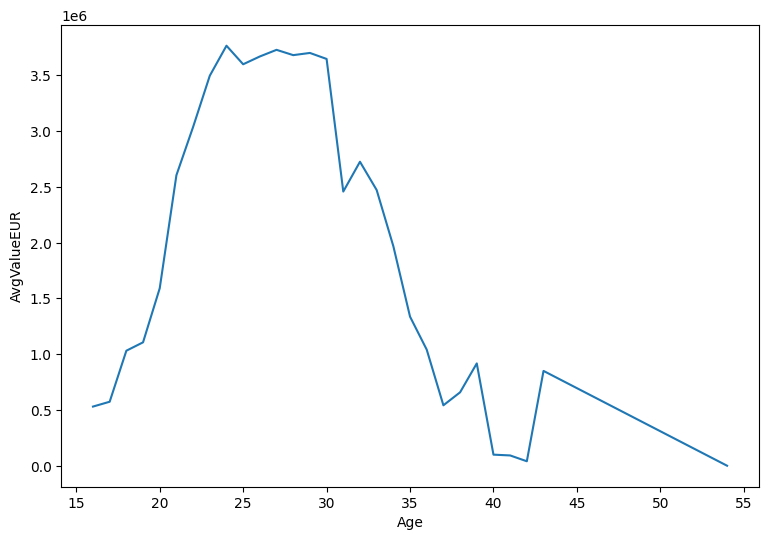

In [327]:
plt.figure(figsize=(9,6))
sns.lineplot(data=avg_player_values, x='Age', y='AvgValueEUR')

We can also watch the average market value of a player by their age and we can see that the most valuable players are older that 20 years old and younger than 30 years old.

# Conclusion

This dataset has shown us some interesting information. For example we are able to see, that in FIFA 2022 some attributes correlate with each other. 

Great example would be the dribbling and passing attribute, that positively correlated both in all age group but also in young talents group. It si quite interesting to see how age is a huge factor. Players average overall are higher the older they are, also almost all of their skills get better with age as well, not including pace though, because as we have seen, players pace decreases as they get older.

This would mean that a young player both skillful and paceful would be very valuable in FIFA 2022 (ValueEUR). We uncovered some of those players earlier.

We can see that only a fraction of players have a high value in FIFA 2022. We were able to see that player's value tend to increase with higher overall, but other factores such as age also factors in. We can see in the final section where we talk about players market value relationship to Overall and Age stats, that players older than 30 years are less valuable than the ones aged 20-30 years old. 